### K-Means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
np.random.seed(1)

In [2]:
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
K = len(np.unique(y))

In [3]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [4]:
# Function to randomly initialize K centroids from the dataset
def initialize_centroids(X, K):
    random_sample_idxs = np.random.choice(X.shape[0], K, replace=False)
    centroids = [X[idx] for idx in random_sample_idxs]
    return centroids

In [5]:
# Function to assign each data point to the nearest centroid
def create_clusters(X, centroids, K):
    clusters = [[] for _ in range(K)]  
    for idx, sample in enumerate(X):
        # Calculate distance of the sample to each centroid
        distances = [euclidean_distance(sample, centroid) for centroid in centroids]
        # Find the index of the closest centroid
        closest_index = np.argmin(distances)
        # Assign the sample to the closest centroid's cluster
        clusters[closest_index].append(idx)
    return clusters

In [6]:
# Function to calculate new centroids as the mean of points in each cluster
def get_centroids(X, clusters, K, n_features):
    centroids = np.zeros((K, n_features))  
    for cluster_idx, cluster in enumerate(clusters):
        # Compute the mean of all points in the cluster
        cluster_mean = np.mean(X[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids

In [7]:
# Function to check if centroids have converged (no change between iterations)
def is_converged(old_centroids, new_centroids, K):
    # Calculate the distance between old and new centroids
    distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(K)]
    return sum(distances) == 0  # Return True if centroids haven't moved

In [8]:
# Function to assign labels to the data points based on their cluster
def get_cluster_labels(clusters, n_samples):
    labels = np.empty(n_samples)  
    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            # Assign each sample to the label of its cluster
            labels[sample_index] = cluster_idx
    return labels

In [9]:
def plot_clusters(X, clusters, centroids):
    fig, ax = plt.subplots(figsize=(5, 3))
    for i, cluster in enumerate(clusters):
        points = X[cluster].T
        ax.scatter(*points)
    for centroid in centroids:
        ax.scatter(*centroid, marker="x", color="black", linewidth=1)
    plt.show()

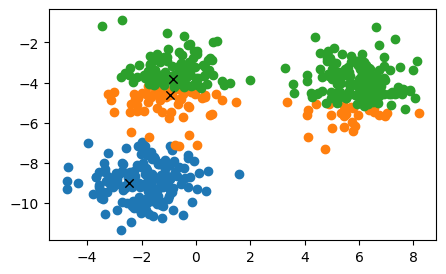

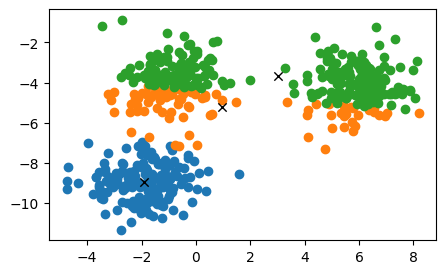

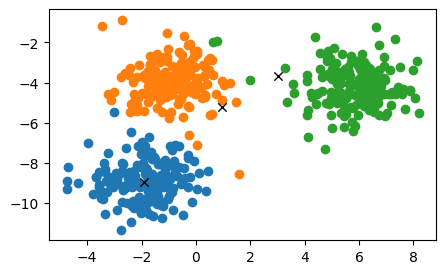

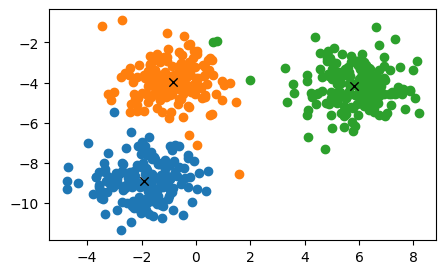

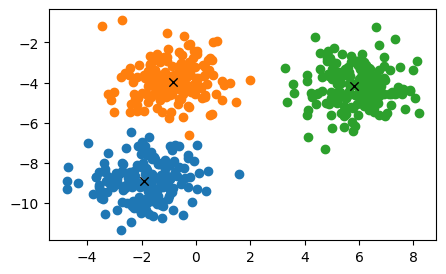

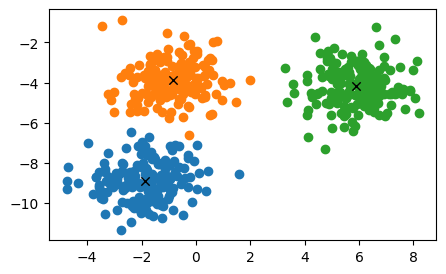

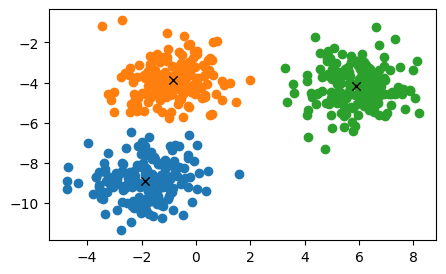

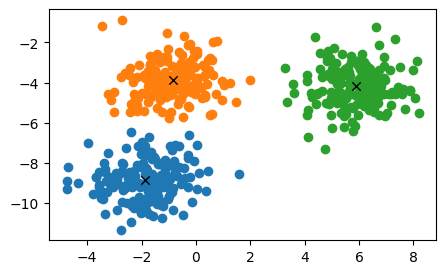

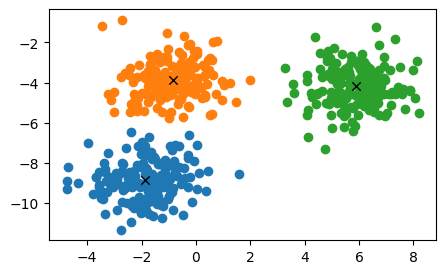

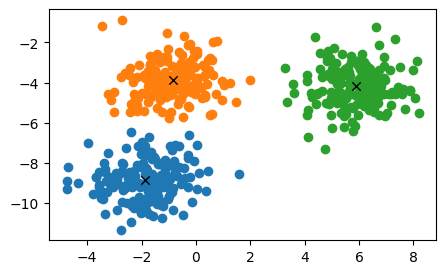

In [10]:
def kmeans(X, K, max_iters=100, plot_steps=False):
    n_samples, n_features = X.shape
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        clusters = create_clusters(X, centroids, K)

        if plot_steps:
            plot_clusters(X, clusters, centroids)

        old_centroids = centroids
        centroids = get_centroids(X, clusters, K, n_features)

        if is_converged(old_centroids, centroids, K):
            break

        if plot_steps:
            plot_clusters(X, clusters, centroids)

    labels = get_cluster_labels(clusters, n_samples)
    return labels, centroids

    
    
labels, centroids = kmeans(X, K, max_iters=150, plot_steps=True)
plot_clusters(X, create_clusters(X, centroids, K), centroids)
